In [1]:
##############################################################
# Author: Dr. Fernando Arce Vega                             #
# Date: 09/06/2019                                           #
##############################################################

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Sigmoid function
def sigmoid(x):
    
    sig = 1 / (1 + np.exp(-x))
    
    return(sig)

# Feed forward
def feed_forward(x, network):
    
    n_layers = network[4]+1 #number of hidden layers plus the output layer
    outputD = {}
    """
    print("============================FEEDFORWARD============================")
    print("=====================input {}=====================".format(x))
    print("Weights {}".format(network[0]))
    print("Bias {}".format(network[1]))
    print("Output {}".format(outputD))
    """
    for i in range(n_layers):
      
      if i==0: #if its the first layer
        #print('Capa {}'.format(i))
        dotproduct = np.matmul(x,network[0]['W_hl'+str(i)].transpose()) + network[1]['b_hl'+str(i)] #does dot product
        output = sigmoid(dotproduct) #
        #print(output)
        #print(output.shape)
        #print(output.transpose().shape)
        outputD['output_hl'+str(i)]=output #stores the output of each layer hidden layer
      elif i==n_layers-1: #if it is the last layer
        #print('Capa {}'.format(i))
        dotproduct = np.matmul(outputD['output_hl'+str(i-1)],network[0]['W_out'].transpose()) + network[1]['b_out'] #does dot product
        output = sigmoid(dotproduct) #
        #print(output)
        #print(output.shape)
        #print(output.transpose().shape)
        outputD['output_out']=output #stores the output of output layer
      else: #if its any other hidden layer
        #print('Capa {}'.format(i))
        dotproduct = np.matmul(outputD['output_hl'+str(i-1)],network[0]['W_hl'+str(i)].transpose()) + network[1]['b_hl'+str(i)] #does dot product
        output = sigmoid(dotproduct) #
        #print(output)
        #print(output.shape)
        #print(output.transpose().shape)
        outputD['output_hl'+str(i)]=output #stores the output of each layer hidden layer                       
      
      #print("Output {}".format(outputD))
    #print("============================FEEDFORWARD============================")
    
    return outputD

# Network error
def net_error(tar, out):
    
    #print("tar:{} out:{}".format(tar,out))
    err = 0.5 * np.power(tar - out, 2)
    
    return(err)

def outputLayer_Error(tar,network):
  
    #print("tar:{} net:{}".format(tar,network[2]['output_out']))
    #return -(tar - network[2]['output_out']) * network[2]['output_out'] * (1 - network[2]['output_out'])
    derivate = network[2]['output_out'] * (1-network[2]['output_out'])
    #print(derivate)
    diff = -(tar - network[2]['output_out'])
    #print(diff)
    return np.multiply(diff,derivate)
    
  
# Back-propagation
def BP(x, tar, network):
  
  
    """
    network[0]: weights
    network[1]: biases
    network[2]: outputs
    network[3]: error layer
    network[4]: n_hidden_layers


    """
    n_layers = network[4]+1 #number of hidden layers plus the output layer

    #Calculating errors of each layer
    for i in reversed(range(n_layers)):
      if i==n_layers-1: #if its the output layer
        # Output layer error (L)
        L_error = outputLayer_Error(tar,network)
        network[3]['e_output'] = L_error
      elif i==n_layers-2: #if its the last hidden layer before output layer
        if network[3]['e_output'].size!=1: #if its not only one neuron
          dotproduct = np.matmul(network[3]['e_output'],network[0]['W_out']) 
          l_error = dotproduct * network[2]['output_hl'+str(i)] * (1 - network[2]['output_hl'+str(i)])
          network[3]['e_hl'+str(i)] = l_error #stores the error of the i-hidden-layer  
        else:
          l_error = (network[3]['e_output'] * network[0]['W_out']) * (network[2]['output_hl'+str(i)] * (1 - network[2]['output_hl'+str(i)]))
          network[3]['e_hl'+str(i)] = l_error #stores the error of the i-hidden-layer  
      else:
        if network[3]['e_hl'+str(i+1)].size!=1:
          dotproduct = np.matmul(network[3]['e_hl'+str(i+1)],network[0]['W_hl'+str(i+1)]) 
          l_error = dotproduct * (network[2]['output_hl'+str(i)] * (1 - network[2]['output_hl'+str(i)]))
          network[3]['e_hl'+str(i)] = l_error #stores the error of the i-hidden-layer
        else:
          l_error = (network[3]['e_hl'+str(i+1)] * network[0]['W_hl'+str(i+1)]) * (network[2]['output_hl'+str(i)] * (1 - network[2]['output_hl'+str(i)]))
          network[3]['e_hl'+str(i)] = l_error #stores the error of the i-hidden-layer
              
    #print("Error {}".format(network[3]))
          
    #Calculating new weights and bias
    n_Weights = {}
    n_Bias = {}
    
    #print(network)
    for i in reversed(range(n_layers)):
      if i==n_layers-1:
        """
        print("Error layer {}".format(i))
        print("Error {}".format(network[3]['e_output']))
        print("previous output {}".format(network[2]['output_hl'+str(i-1)]))
        #n_W_out = network[0]['W_out'] - alpha * network[3]['e_output'] * network[2]['output_hl'+str(i-1)]
        #e_reshape = np.reshape(network[3]['e_output'],(network[3]['e_output'].size,1))
        #n_W_out = np.subtract(network[0]['W_out'] , (alpha * np.multiply(e_reshape , network[2]['output_hl'+str(i-1)])))
        """
        n_W_out = np.subtract(network[0]['W_out'] , (alpha * np.multiply(network[3]['e_output'] , network[2]['output_hl'+str(i-1)])))
        n_Weights['W_out'] = n_W_out
        n_b_out = network[1]['b_out'] - alpha * network[3]['e_output'] #calculates the new bias for the output layer
        n_Bias['b_out'] = n_b_out
      elif i!=0:
        """
        print("Error layer {}".format(i))
        print("Error {}".format(network[3]['e_hl'+str(i)]))
        print("previous output {}".format(network[2]['output_hl'+str(i-1)]))
        #n_W_hl = network[0]['W_hl'+str(i)] - (alpha * (network[3]['e_hl'+str(i)] * network[2]['output_hl'+str(i-1)])) #Actual weights - alpha *output_error *  activation_input_of_previous_hiddenLayer
        """
        e_reshape = np.reshape(network[3]['e_hl'+str(i)],(network[3]['e_hl'+str(i)].size,1))
        n_W_hl = np.subtract(network[0]['W_hl'+str(i)] , (alpha * np.multiply(e_reshape , network[2]['output_hl'+str(i-1)]))) #Actual weights - alpha *output_error *  activation_input_of_previous_hiddenLayer
        n_Weights['W_hl'+str(i)] = n_W_hl
        n_b_hl = network[1]['b_hl'+str(i)] - (alpha * network[3]['e_hl'+str(i)])
        n_Bias['b_hl'+str(i)] = n_b_hl                                     
      else:
        """
        print("Error layer {}".format(i))
        print("Error {}".format(network[3]['e_hl'+str(i)]))
        print("previous output {}".format(x))
        #n_W_hl = network[0]['W_hl'+str(i)] - (alpha * (network[3]['e_hl'+str(i)] * x)) #Actual weights - alpha *output_error * actual_input
        """
        e_reshape = np.reshape(network[3]['e_hl'+str(i)],(network[3]['e_hl'+str(i)].size,1))
        n_W_hl = np.subtract(network[0]['W_hl'+str(i)] , (alpha * np.multiply(e_reshape , x))) #Actual weights - alpha *output_error * actual_input
        n_Weights['W_hl'+str(i)] = n_W_hl   
        n_b_hl = network[1]['b_hl'+str(i)] - (alpha * network[3]['e_hl'+str(i)]) #Actual bias - alpha * output_error
        n_Bias['b_hl'+str(i)] = n_b_hl
    
    return(n_Weights,n_Bias)

# Testing patterns
def testing_patterns(X, network):
    
    print('       MLP result      ')
    print('Pat:          t:      out:')
    count = 0
    for x in X:
        output = feed_forward(x, network)
        print('{}. {} ---- {} ----> {:.3f}'.format(count, x, t[count], float(output['output_out'])))
        count += 1
    
# Graph error
def graph_error(err_vector):

    plt.figure(0)
    plt.plot(err_vector)
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title('BP algorithm')
    plt.show()

# Decision boundaries
def dec_boundaries(X, t, network):
    
    # Creating mesh
    h = 0.01
    x_min, x_max = -0.2, 1.2
    y_min, y_max = -0.2, 1.2

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = np.c_[xx.ravel(), yy.ravel()]
    out = np.zeros(np.shape(Z)[0])
    
    # Output model
    for i in range(len(out)):
        outputD =  feed_forward(Z[i], network)
        out[i] = outputD['output_out']

    # out = (out >= 0.5).astype(int)
    out = out.reshape(xx.shape)
    levels = np.linspace(0, 1)
    plt.figure(1)
    plt.contourf(xx, yy, out, levels)
    plt.colorbar()

    # Plotting data
    lis = np.unique(t)
    for i in range(len(t)):
        if i == 0:
            pos = np.where(t == 0)[0]
            plt.plot(X[pos][:, 0], X[pos][:, 1], 'o', color = 'white', markersize = 15)

        else:
            pos = np.where(t == 1)[0]
            plt.plot(X[pos][:, 0], X[pos][:, 1], 'x', color = 'red', markersize = 15)

    plt.title('Decision boundary')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

def def_param(n_layers,X,t):
  weights = {}
  bias = {}
  n_neurons_layer = {}
  """
  initializing weights and bias as follows:
  np.random.normal(size=(param1,param2)), size takes two arguments where:
  
  param1 = no. neurons in the current layer
  param2 = no. neurons in the previous layer
  """
  for i in range(n_layers+1):
    
    if i==0:#if its the first layer
      n_neurons = int(input("Numero de neuronas en la capa {} ".format(i)))
      weights['W_hl'+str(i)] = np.random.normal(size=(n_neurons,X.shape[1]))#the no. of neurons in the previous layers is equal to the input vector length
      bias['b_hl'+str(i)] = np.random.normal(size=n_neurons)#the no. of bias is equal to the number of neurons
      n_neurons_layer['n_neurons'+str(i)] = n_neurons#stores the number of neurons in the current layer
    elif i==n_layers: #if its the output layer
      """
      the number of neurons in the current layer is equal to the target vector length
      """
      #weights['W_out'] = np.random.normal(size=(t.shape[1],n_neurons_layer['n_neurons'+str(i-1)]))
      #bias['b_out'] = np.random.normal(size=t.shape[1])
      weights['W_out'] = np.random.normal(size=(n_neurons_layer['n_neurons'+str(i-1)]))
      bias['b_out'] = np.random.normal(1)
      n_neurons_layer['n_neurons'+str(i)] =  1#stores the number of neurons in the current layer
    else:#if its any other hidden layer
      n_neurons = int(input("Numero de neuronas en la capa {} ".format(i)))
      weights['W_hl'+str(i)] = np.random.normal(size=(n_neurons,n_neurons_layer['n_neurons'+str(i-1)]))
      bias['b_hl'+str(i)] = np.random.normal(size=n_neurons)
      n_neurons_layer['n_neurons'+str(i)] =  n_neurons#stores the number of neurons in the current layer
  
  #print(weights)
  #print(bias)
  return weights,bias      
    
# Training patterns and targets
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

t = np.array([0, 0, 0, 1])



In [ ]:
def_param(2,X,t)

## **Modelo de la red neuronal**

In [2]:

def Neural_network_model(X):
  
  n_hidden_layers = int(input('Número de capas ocultas: '))
  #n_nodes_hl1 = int(input('Número de neuronas en capa oculta: '))
  # Initial weights
  #using a normal(gaussian)distribution
  network = []
  
  layer_output = {}
  error_layer = {}
  weights,biases = def_param(n_hidden_layers,X,t)
  network.append(weights)
  network.append(biases)
  network.append(layer_output)
  network.append(error_layer)
  network.append(n_hidden_layers)
  
  
  return network


In [0]:
def Neural_network_model(X):
  
  n_hidden_layers = 1
  n_nodes_hl1 = int(input('Número de neuronas en capa oculta: '))
  # Initial weights
  #using a normal(gaussian)distribution
  network = []
  
  weights = {
      'W_hl0':np.random.normal(size=(n_nodes_hl1,X.shape[1])),
      'W_out':np.random.normal(size=(n_nodes_hl1))
  }
  
  
  
  biases = {
      'b_hl0':np.random.normal(size=(n_nodes_hl1)),
      'b_out':np.random.normal(size=(1))
  }
  
  
  layer_output = {}
  error_layer = {}
  
  network.append(weights)
  network.append(biases)
  network.append(layer_output)
  network.append(error_layer)
  network.append(n_hidden_layers)
  
  
  return network

In [3]:
alpha = 0.8
network = Neural_network_model(X)
print(network)


Número de capas ocultas: 4
Numero de neuronas en la capa 0 2
Numero de neuronas en la capa 1 2
Numero de neuronas en la capa 2 2
Numero de neuronas en la capa 3 2
[{'W_hl0': array([[ 1.22216925,  0.25042195],
       [ 0.1492466 , -0.17955758]]), 'W_hl1': array([[ 0.14605094,  0.25456306],
       [ 1.4331441 , -0.71575726]]), 'W_hl2': array([[-0.50559693, -1.19035341],
       [-0.86414604, -1.10551269]]), 'W_hl3': array([[-0.03868184,  0.87525387],
       [ 0.51928448,  0.221482  ]]), 'W_out': array([0.34489185, 1.97550731])}, {'b_hl0': array([-0.86665293, -0.88733729]), 'b_hl1': array([ 0.44768812, -1.12095785]), 'b_hl2': array([-1.30365831, -0.06071498]), 'b_hl3': array([ 0.08172936, -1.69604011]), 'b_out': 2.4710367544229572}, {}, {}, 4]


## **Entrenando la red neuronal**

Epoch 0 error 0.0015897040139103533
Epoch 1 error 0.0015878271433776728
Epoch 2 error 0.0015859544092476899
Epoch 3 error 0.0015840857981807574
Epoch 4 error 0.001582221296893815
Epoch 5 error 0.0015803608921601392
Epoch 6 error 0.001578504570809032
Epoch 7 error 0.0015766523197254943
Epoch 8 error 0.0015748041258499988
Epoch 9 error 0.001572959976178124
Epoch 10 error 0.0015711198577603343
Epoch 11 error 0.0015692837577016478
Epoch 12 error 0.0015674516631613556
Epoch 13 error 0.0015656235613527836
Epoch 14 error 0.0015637994395429505
Epoch 15 error 0.0015619792850523001
Epoch 16 error 0.0015601630852544774
Epoch 17 error 0.0015583508275759802
Epoch 18 error 0.0015565424994959279
Epoch 19 error 0.001554738088545796
Epoch 20 error 0.0015529375823090871
Epoch 21 error 0.0015511409684211257
Epoch 22 error 0.0015493482345687781
Epoch 23 error 0.001547559368490136
Epoch 24 error 0.0015457743579743305
Epoch 25 error 0.0015439931908611997
Epoch 26 error 0.0015422158550410724
Epoch 27 error 0

Epoch 372 error 0.00109543481393594
Epoch 373 error 0.001094498667900525
Epoch 374 error 0.0010935640159207513
Epoch 375 error 0.0010926308545075704
Epoch 376 error 0.0010916991801826347
Epoch 377 error 0.001090768989478309
Epoch 378 error 0.0010898402789375936
Epoch 379 error 0.0010889130451140925
Epoch 380 error 0.0010879872845719848
Epoch 381 error 0.0010870629938859618
Epoch 382 error 0.0010861401696412067
Epoch 383 error 0.0010852188084333509
Epoch 384 error 0.0010842989068684241
Epoch 385 error 0.001083380461562829
Epoch 386 error 0.0010824634691432868
Epoch 387 error 0.0010815479262468262
Epoch 388 error 0.0010806338295207031
Epoch 389 error 0.0010797211756223921
Epoch 390 error 0.0010788099612195367
Epoch 391 error 0.0010779001829899254
Epoch 392 error 0.0010769918376214238
Epoch 393 error 0.001076084921811969
Epoch 394 error 0.0010751794322695091
Epoch 395 error 0.0010742753657119782
Epoch 396 error 0.0010733727188672493
Epoch 397 error 0.001072471488473111
Epoch 398 error 0.0

Epoch 784 error 0.0008055421712010876
Epoch 785 error 0.0008050151059669174
Epoch 786 error 0.0008044886852708701
Epoch 787 error 0.0008039629079599542
Epoch 788 error 0.000803437772883899
Epoch 789 error 0.0008029132788951478
Epoch 790 error 0.0008023894248488297
Epoch 791 error 0.0008018662096027831
Epoch 792 error 0.0008013436320175142
Epoch 793 error 0.0008008216909562175
Epoch 794 error 0.0008003003852847482
Epoch 795 error 0.000799779713871625
Epoch 796 error 0.0007992596755880229
Epoch 797 error 0.0007987402693077487
Epoch 798 error 0.0007982214939072587
Epoch 799 error 0.0007977033482656437
Epoch 800 error 0.0007971858312646001
Epoch 801 error 0.0007966689417884472
Epoch 802 error 0.0007961526787241167
Epoch 803 error 0.0007956370409611319
Epoch 804 error 0.000795122027391615
Epoch 805 error 0.0007946076369102599
Epoch 806 error 0.0007940938684143494
Epoch 807 error 0.0007935807208037365
Epoch 808 error 0.0007930681929808219
Epoch 809 error 0.0007925562838505785
Epoch 810 error

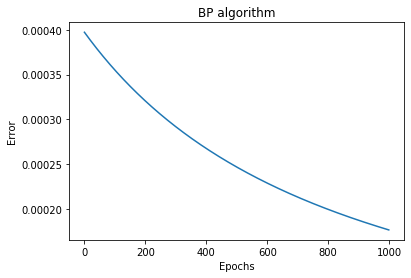

In [5]:
err_vector = []

epochs = 1000

for epoch in range(epochs):

    count = 0
    err = 0

    for x in X:

        # Feed forward
        network[2] = feed_forward(x, network)

        # Network error
        err += net_error(t[count], network[2]['output_out'])

        # Back propagation
        network[0],network[1] = BP(x, t[count], network)

        count += 1
    print("Epoch {} error {}".format(epoch,err))    
    err_vector.append(err / X.shape[0])

# Testing patterns
testing_patterns(X, network)

# Graph error
graph_error(err_vector)

# Decision boundaries
#dec_boundaries(X, t,  network)

